# Initial End-to-End Pipeline

In [7]:
from fastai.vision.all import *
from sklearn.model_selection import StratifiedKFold

## Load Data

In [2]:
path = Path("/home/jupyter/kaggle/data/plant-pathology-2020/"); path.ls()

(#4) [Path('/home/jupyter/kaggle/data/plant-pathology-2020/test.csv'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/images'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/train.csv'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/sample_submission.csv')]

In [4]:
path_imgs = path/'images'; path_imgs.ls()

(#3642) [Path('/home/jupyter/kaggle/data/plant-pathology-2020/images/Train_1104.jpg'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/images/Test_272.jpg'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/images/Test_1380.jpg'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/images/Train_1217.jpg'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/images/Test_479.jpg'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/images/Train_850.jpg'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/images/Train_1534.jpg'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/images/Train_404.jpg'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/images/Test_471.jpg'),Path('/home/jupyter/kaggle/data/plant-pathology-2020/images/Test_402.jpg')...]

In [6]:
df = pd.read_csv(path/'train.csv'); df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


### Create Folds

In [8]:
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True); df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_1511,0,0,1,0
1,Train_1799,1,0,0,0
2,Train_135,1,0,0,0
3,Train_408,0,0,1,0
4,Train_1693,1,0,0,0


In [20]:
df.columns[df.iloc[0]==1].item()

'rust'

In [24]:
lbls = df.apply(lambda r: df.columns[r==1].item(), axis=1); lbls.iloc[:3]

0       rust
1    healthy
2    healthy
dtype: object

In [42]:
kf = StratifiedKFold(n_splits=5)
for fold, (train_idxs, val_idxs) in enumerate(kf.split(df, lbls.values)):
    print(len(train_idxs)/len(df), len(val_idxs)/len(df))
    df.loc[val_idxs, "fold"] = fold

0.7995606809445359 0.20043931905546403
0.800109829763866 0.19989017023613398
0.800109829763866 0.19989017023613398
0.800109829763866 0.19989017023613398
0.800109829763866 0.19989017023613398


In [53]:
pd.set_option('display.max_columns', None)
df.groupby("fold").describe()

healthy                                              multiple_diseases  \
       count      mean       std  min  25%  50%  75%  max             count   
fold                                                                          
0.0    365.0  0.282192  0.450684  0.0  0.0  0.0  1.0  1.0             365.0   
1.0    364.0  0.282967  0.451061  0.0  0.0  0.0  1.0  1.0             364.0   
2.0    364.0  0.285714  0.452376  0.0  0.0  0.0  1.0  1.0             364.0   
3.0    364.0  0.282967  0.451061  0.0  0.0  0.0  1.0  1.0             364.0   
4.0    364.0  0.282967  0.451061  0.0  0.0  0.0  1.0  1.0             364.0   

                                                    rust                      \
          mean       std  min  25%  50%  75%  max  count      mean       std   
fold                                                                           
0.0   0.052055  0.222442  0.0  0.0  0.0  0.0  1.0  365.0  0.342466  0.475186   
1.0   0.049451  0.217105  0.0  0.0  0.0  0.0  1.0  364.0  0.343407  0.475499   
2.0   0.049451  0.217105  0.0  0.0  0.0  0.0  1.0  364.0  0.340659  0.474583   
3.0   0.049451  0.217105  0.0  0.0  0.0  0.0  1.0  364.0  0.340659  0.474583   
4.0   0.049451  0.217105  0.0  0.0  0.0  0.0  1.0  364.0  0.340659  0.474583   

                                scab                                          \
      min  25%  50%  75%  max  count      mean       std  min  25%  50%  75%   
fold                                                                           
0.0   0.0  0.0  0.0  1.0  1.0  365.0  0.323288  0.468374  0.0  0.0  0.0  1.0   
1.0   0.0  0.0  0.0  1.0  1.0  364.0  0.324176  0.468710  0.0  0.0  0.0  1.0   
2.0   0.0  0.0  0.0  1.0  1.0  364.0  0.324176  0.468710  0.0  0.0  0.0  1.0   
3.0   0.0  0.0  0.0  1.0  1.0  364.0  0.326923  0.469735  0.0  0.0  0.0  1.0   
4.0   0.0  0.0  0.0  1.0  1.0  364.0  0.326923  0.469735  0.0  0.0  0.0  1.0   

           
      max  
fold       
0.0   1.0  
1.0   1.0  
2.0   1.0  
3.0   1.0  
4.0   1.0

In [56]:
df.to_csv(path/"train_folds.csv", index=False)

## Process Data

In [64]:
path_imgs/f'{df.iloc[0]["image_id"]}.jpg'

Path('/home/jupyter/kaggle/data/plant-pathology-2020/images/Train_1511.jpg')

In [67]:
ColReader("image_id", pref=path_imgs, suff=".jpg")(df.iloc[0])

'/home/jupyter/kaggle/data/plant-pathology-2020/images/Train_1511.jpg'

In [113]:
VAL_FOLD = 0
data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_x=ColReader("image_id", pref=path_imgs, suff=".jpg"),
                get_y=lambda r: df.columns[r==1][0],
                splitter=MaskSplitter(df["fold"]==VAL_FOLD),
                item_tfms=Resize(256),
                batch_tfms=aug_transforms(flip_vert=True, size=200, min_scale=0.3))

In [114]:
defaults.cpus

8

In [115]:
dls = data.dataloaders(df, bs=128, num_workers=8)
len(dls.train), len(dls.valid), len(dls.train_ds), len(dls.valid_ds)

(11, 3, 1456, 365)

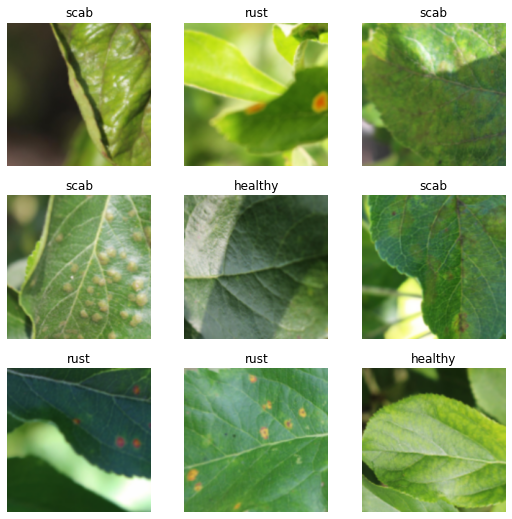

In [116]:
dls.show_batch()

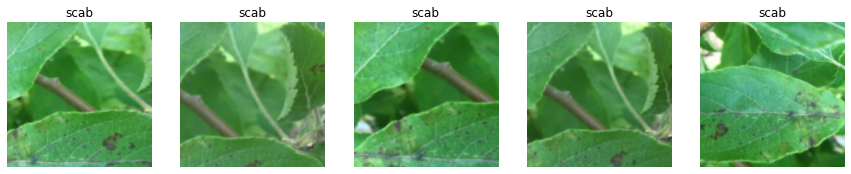

In [117]:
dls.show_batch(unique=True, max_n=5, nrows=1)

## Create Model

In [125]:
learn = cnn_learner(dls, resnet18, metrics=[RocAuc(), accuracy])

## Train Model

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.0014454397605732083)

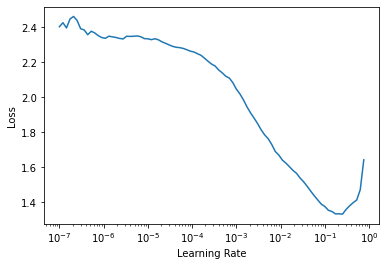

In [119]:
learn.lr_find()

In [126]:
learn.fine_tune(5, 2e-2)

epoch,train_loss,valid_loss,roc_auc_score,accuracy,time
0,1.392544,1.471893,0.912203,0.736986,00:26


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fc9dd3290>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fc9dd3290>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join

epoch,train_loss,valid_loss,roc_auc_score,accuracy,time
0,0.654720,0.943481,0.952078,0.841096,00:27
1,0.542820,1.588488,0.929374,0.739726,00:26
2,0.476092,0.459812,0.970485,0.909589,00:27
3,0.423689,0.235563,0.982328,0.934247,00:26
4,0.374305,0.219113,0.980776,0.936986,00:26


## Analyze Model

In [128]:
interp = ClassificationInterpretation.from_learner(learn)

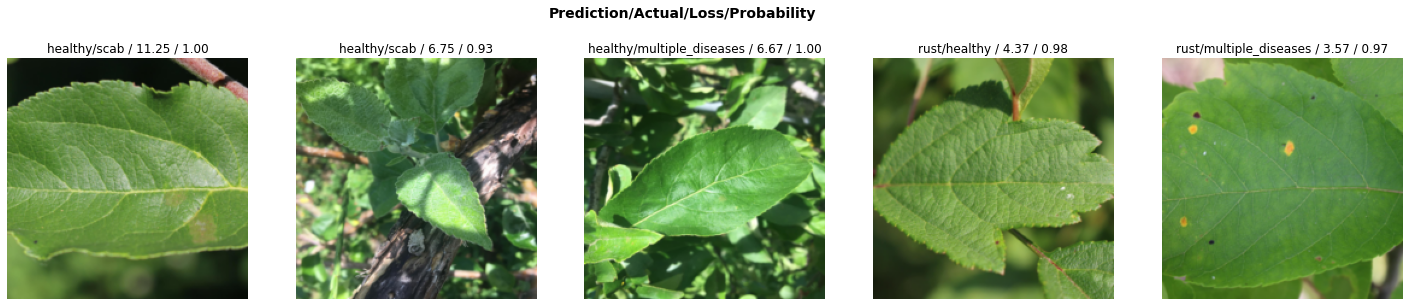

In [138]:
interp.plot_top_losses(5, nrows=1, figsize=(25, 5))

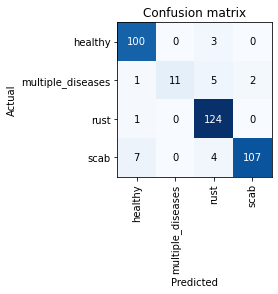

In [130]:
interp.plot_confusion_matrix()

## Run Inference

In [142]:
df_test = pd.read_csv(path/'test.csv'); df_test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [150]:
len(df_test)

1821

In [143]:
test_dl = learn.dls.test_dl(df_test)

In [146]:
xb = test_dl.one_batch(); xb[0].shape

torch.Size([128, 3, 200, 200])

In [149]:
preds, _ = learn.get_preds(dl=test_dl); preds.shape

torch.Size([1821, 4])

## Submit Results

In [127]:
submission = pd.read_csv(path/'sample_submission.csv'); submission.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


In [152]:
submission["healthy"] = preds[:, 0]
submission["multiple_diseases"] = preds[:, 1]
submission["rust"] = preds[:, 2]
submission["scab"] = preds[:, 3]
submission

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,1.816247e-04,2.079656e-03,9.975999e-01,1.387243e-04
1,Test_1,1.105865e-04,2.522720e-03,9.973251e-01,4.166995e-05
2,Test_2,7.153506e-06,9.060627e-04,1.246375e-08,9.990867e-01
3,Test_3,9.999312e-01,1.240918e-06,6.722214e-05,3.001736e-07
4,Test_4,1.852950e-07,7.487196e-07,9.999990e-01,2.167653e-10
...,...,...,...,...,...
1816,Test_1816,1.092629e-06,7.791455e-05,9.999210e-01,1.750893e-08
1817,Test_1817,7.775954e-03,3.316808e-01,5.665774e-01,9.396587e-02
1818,Test_1818,3.380315e-05,6.970362e-04,9.992542e-01,1.505119e-05
1819,Test_1819,9.999586e-01,1.192460e-05,2.808589e-05,1.326602e-06


In [165]:
submission.to_csv(path/"submission.csv", index=False)

In [166]:
!kaggle competitions submit -c plant-pathology-2020-fgvc7 -f {path}/submission.csv -m "Back at it again! :)"

100%|████████████████████████████████████████| 103k/103k [00:02<00:00, 38.8kB/s]
Successfully submitted to Plant Pathology 2020 - FGVC7